<a href="https://colab.research.google.com/github/maximeLpt/DL_project/blob/main/SimpleRegress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

training_data = pd.read_csv("if_yoy_can_you_live.csv")
training_data

,Unnamed: 0,kpler_index,signal_high_api,signal_low_api,signal_high_sulfur,signal_low_sulfur,signal_raw,brent_m1m2,brent_m3m4,dfl,month,day,day_of_week,month_sin,month_cos,kpler_index_SMA_5,kpler_index_SMA_20,kpler_index_SMA_50,kpler_index_SMA_75,signal_high_api_SMA_5,signal_high_api_SMA_20,signal_high_api_SMA_50,signal_high_api_SMA_75,signal_low_api_SMA_5,signal_low_api_SMA_20,signal_low_api_SMA_50,signal_low_api_SMA_75,signal_high_sulfur_SMA_5,signal_high_sulfur_SMA_20,signal_high_sulfur_SMA_50,signal_high_sulfur_SMA_75,signal_low_sulfur_SMA_5,signal_low_sulfur_SMA_20,signal_low_sulfur_SMA_50,signal_low_sulfur_SMA_75,signal_raw_SMA_5,signal_raw_SMA_20,signal_raw_SMA_50,signal_raw_SMA_75,brent_m1m2_SMA_5,brent_m1m2_SMA_20,brent_m1m2_SMA_50,brent_m1m2_SMA_75,brent_m3m4_SMA_5,brent_m3m4_SMA_20,brent_m3m4_SMA_50,brent_m3m4_SMA_75,dfl_SMA_5,dfl_SMA_20,dfl_SMA_50,dfl_SMA_75,month_SMA_5,month_SMA_20,month_SMA_50,month_SMA_75,day_SMA_5,day_SMA_20,day_SMA_50,day_SMA_75,day_of_week_SMA_5,day_of_week_SMA_20,day_of_week_SMA_50,day_of_week_SMA_75,month_sin_SMA_5,month_sin_SMA_20,month_sin_SMA_50,month_sin_SMA_75,month_cos_SMA_5,month_cos_SMA_20,month_cos_SMA_50,month_cos_SMA_75,moving_correl_30,moving_correl_50,moving_correl_75,target
0,2016-08-17,-0.148709,0.517667,-0.567917,-0.342500,0.441923,0.035185,0.31,-0.44,-1.11,8.0,16.0,1.0,-8.660254e-01,-0.500000,-0.262041,-0.276216,-0.379981,-0.360854,0.502600,0.455833,0.243927,0.232858,-0.683500,-0.829500,-0.906700,-0.925278,-0.463143,-0.534446,-0.655971,-0.660105,0.447769,0.335827,0.150931,0.125462,-0.024556,-0.115426,-0.267463,-0.281869,0.260,0.1860,0.1398,0.239600,-0.476,-0.5345,-0.5190,-0.471867,-1.226,-1.3800,-1.3970,-1.317333,8.0,7.60,6.90,6.333333,12.8,14.70,15.06,14.906667,2.0,2.0,2.0,2.000000,-0.866025,-7.196152e-01,-0.417846,-0.145231,-0.500000,-0.646410,-0.823731,-0.846761,0.692622,0.052064,0.264829,-0.06
1,2016-08-18,-0.146644,0.531667,-0.538333,-0.323571,0.465000,0.056111,0.33,-0.44,-1.06,8.0,17.0,2.0,-8.660254e-01,-0.500000,-0.240054,-0.269423,-0.374474,-0.357109,0.502267,0.463483,0.252940,0.237138,-0.637833,-0.811000,-0.898975,-0.919111,-0.424143,-0.520036,-0.648993,-0.655343,0.447538,0.346212,0.160946,0.130964,-0.004444,-0.102954,-0.259022,-0.276751,0.290,0.1980,0.1394,0.237333,-0.454,-0.5275,-0.5208,-0.472267,-1.162,-1.3625,-1.3944,-1.315733,8.0,7.65,6.94,6.373333,14.2,14.55,15.24,15.080000,2.0,2.0,2.0,2.000000,-0.866025,-7.379165e-01,-0.435167,-0.163444,-0.500000,-0.628109,-0.813731,-0.841880,0.708947,0.104499,0.279822,-0.03
2,2016-08-19,-0.171277,0.482333,-0.541667,-0.369643,0.454615,0.027222,0.30,-0.45,-1.13,8.0,18.0,3.0,-8.660254e-01,-0.500000,-0.203597,-0.261893,-0.368735,-0.354272,0.496200,0.469350,0.261500,0.240778,-0.597000,-0.792667,-0.891067,-0.913100,-0.391929,-0.506804,-0.642679,-0.651214,0.443538,0.355654,0.171323,0.136267,0.010333,-0.091546,-0.250752,-0.272057,0.302,0.2055,0.1384,0.234667,-0.446,-0.5225,-0.5224,-0.472933,-1.122,-1.3485,-1.3930,-1.315333,8.0,7.70,6.98,6.413333,15.6,14.40,15.42,15.253333,2.0,2.0,2.0,2.000000,-0.866025,-7.562178e-01,-0.452487,-0.181658,-0.500000,-0.609808,-0.803731,-0.837000,0.727062,0.178703,0.303399,0.02
3,2016-08-22,-0.269281,0.453000,-0.545833,-0.390357,0.439231,0.009074,0.25,-0.46,-1.11,8.0,19.0,4.0,-8.660254e-01,-0.500000,-0.200206,-0.261100,-0.364659,-0.353129,0.492667,0.473433,0.270320,0.243996,-0.565333,-0.774125,-0.883075,-0.907089,-0.371286,-0.494054,-0.636579,-0.647219,0.446462,0.363750,0.182308,0.141226,0.022444,-0.081037,-0.242300,-0.267598,0.298,0.2100,0.1364,0.232000,-0.446,-0.5145,-0.5238,-0.473467,-1.106,-1.3300,-1.3914,-1.314400,8.0,7.75,7.02,6.453333,17.0,14.25,15.60,15.426667,2.0,2.0,2.0,2.000000,-0.866025,-7.745191e-01,-0.469808,-0.199872,-0.500000,-0.591506,-0.793731,-0.832120,0.725349,0.249597,0.315674,0.10
4,2016-08-23,-0.254736,0.439333,-0.541667,-0.408571,0.446923,0.003333,0.16,-0.47,-1.18,8.0,22.0,0.0,-8.660254e-01,-0.500000,-0.198129,-0.255847,-0.358231,-0.351695,0.484800,0.476400,0.279173,0.246747,-0.54

In [ ]:
training_data.dropna(inplace=True)

In [ ]:
def make_centered_classification(train_data, target_col='target'):
    """Turns regression into discretized classfication problem"""
    train_data_classification = train_data.copy()
    def assing_label(x):
        if x < -0.05:
            return -1
        if x < 0.05:
            return 0
        return 1
    train_data_classification[target_col] = [assing_label(x) for x in train_data_classification[target_col]]
    return train_data_classification

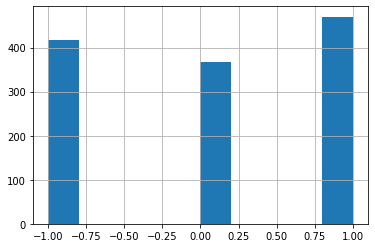

In [ ]:
training_data_center = make_centered_classification(training_data)
training_data_center['target'].hist()

In [ ]:
target = training_data_center['target']
train = training_data_center.drop(columns=['Unnamed: 0', 'target'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train, 
    target, 
    train_size=0.8,
    shuffle=False
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=10000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
        "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
        "Naive Bayes", "QDA"]

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    score = f1_score(preds, y_test, average="weighted")
    print(f"{name}: {score}")
    print(confusion_matrix(y_test, preds))

Nearest Neighbors: 0.37073828395050523
[[30 21 13]
 [46 23 23]
 [35 20 41]]
Linear SVM: 0.5363679468942626
[[42  0 22]
 [58  0 34]
 [26  0 70]]
RBF SVM: 0.5517241379310345
[[ 0  0 64]
 [ 0  0 92]
 [ 0  0 96]]
Gaussian Process: 0.5446323027653429
[[25  8 31]
 [15 16 61]
 [ 3  9 84]]
Decision Tree: 0.45705039667747915
[[44 14  6]
 [45 41  6]
 [36 31 29]]
Random Forest: 0.34840685464816284
[[ 7  4 53]
 [24 10 58]
 [23 13 60]]
Neural Net: 0.4356716228237387
[[31 16 17]
 [53  5 34]
 [24  9 63]]
AdaBoost: 0.49010780771787066
[[ 1 11 52]
 [ 0  3 89]
 [ 9  0 87]]
Naive Bayes: 0.37738047545979697
[[ 9 36 19]
 [16 38 38]
 [ 6 45 45]]
QDA: 0.4952960407288481
[[ 0 14 50]
 [ 0 28 64]
 [ 0 19 77]]


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# Simple models

## Logistic regression

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(train)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

log_reg = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    max_iter=1000,
    C=1
)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit()
log_reg_scores = cross_val_score(
    log_reg, X_train, target, cv=tscv, scoring='f1_weighted', n_jobs=-1, verbose=1
)
log_reg_scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished


array([0.2585882 , 0.60106572, 0.60249706, 0.44807145, 0.57357119])

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(LogisticRegression(
    penalty='l1',
    solver='liblinear',
    max_iter=1000,
    C=1
))
rfe.fit(X_train, target)

RFE(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=1000,
                                 multi_class='auto', n_jobs=None, penalty='l1',
                                 random_state=None, solver='liblinear',
                                 tol=0.0001, verbose=0, warm_start=False),
    n_features_to_select=None, step=1, verbose=0)

In [ ]:
training_data_center.drop(columns=['target', 'Unnamed: 0']).columns[rfe.support_]

Index(['kpler_index', 'signal_low_api', 'signal_high_sulfur', 'brent_m1m2',
       'brent_m3m4', 'dfl', 'month', 'month_cos', 'kpler_index_SMA_5',
       'kpler_index_SMA_20', 'kpler_index_SMA_50', 'kpler_index_SMA_75',
       'signal_high_api_SMA_50', 'signal_high_api_SMA_75',
       'signal_low_api_SMA_50', 'signal_low_api_SMA_75',
       'signal_high_sulfur_SMA_50', 'signal_low_sulfur_SMA_5',
       'signal_low_sulfur_SMA_20', 'brent_m1m2_SMA_5', 'brent_m1m2_SMA_20',
       'brent_m3m4_SMA_5', 'brent_m3m4_SMA_20', 'brent_m3m4_SMA_50',
       'brent_m3m4_SMA_75', 'dfl_SMA_5', 'dfl_SMA_20', 'dfl_SMA_50',
       'month_SMA_5', 'month_SMA_20', 'month_SMA_50', 'day_SMA_5',
       'day_SMA_50', 'day_SMA_75', 'month_sin_SMA_5', 'month_sin_SMA_75'],
      dtype='object')

## GPC

In [ ]:
gauss = GaussianProcessClassifier(1.0 * RBF(1.0), n_jobs=-1)
gauss_scores = cross_val_score(
    gauss, X_train, target, cv=tscv, scoring='f1_weighted', n_jobs=-1, verbose=1
)
gauss_scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


array([0.29700729, 0.18283402, 0.35211418, 0.32822531, 0.45404228])

## NN

In [ ]:
nn = MLPClassifier(alpha=1, max_iter=10000)
nn_scores = cross_val_score(
    nn, X_train, target, cv=tscv, scoring='f1_weighted', n_jobs=-1, verbose=1
)
nn_scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished


array([0.37842168, 0.34339148, 0.30283394, 0.39344307, 0.46577991])

## RF

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
rf_scores = cross_val_score(
    rf, X_train, target, cv=tscv, scoring='f1_weighted', n_jobs=-1, verbose=1
)
rf_scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.3s finished


array([0.28172274, 0.40702818, 0.08069481, 0.29320803, 0.39579351])

## XGB

In [ ]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(max_depth=2)
xgb_scores = cross_val_score(
    xgb, X_train, target, cv=tscv, scoring='f1_weighted', n_jobs=-1, verbose=1
)
xgb_scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished


array([0.36741481, 0.37029299, 0.21176405, 0.30135891, 0.25203455])

In [ ]:
XGBClassifier?

# Stacking

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, 
    target, 
    train_size=0.8,
    shuffle=False
)

In [ ]:
from mlxtend.classifier import StackingClassifier

m = StackingClassifier(
    classifiers=[
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025, probability=True),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1, max_iter=10000),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()],
    use_probas=True,
    meta_classifier=LogisticRegression()
)

In [ ]:
m.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


StackingClassifier(average_probas=False,
                   classifiers=[KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=3,
                                                     p=2, weights='uniform'),
                                SVC(C=0.025, break_ties=False, cache_size=200,
                                    class_weight=None, coef0=0.0,
                                    decision_function_shape='ovr', degree=3,
                                    gamma='scale', kernel='linear', max_iter=-1,
                                    probab...
                   meta_classifier=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                     

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix

predictions = m.predict(X_test)
f1_score(predictions, y_test, average='weighted')

0.3901005696963854

In [ ]:
confusion_matrix(y_test, predictions)

array([[22, 30, 12],
       [35, 32, 25],
       [28, 22, 46]])

## Blending

In [ ]:
models = [log_reg, gauss, nn, rf]
preds = pd.DataFrame()
for i, m in enumerate(models):
    m.fit(X_train, y_train),
    preds[i] = m.predict_proba(X_test)[:, 1]

In [ ]:
weights = [1.25, 0.5, 0.2, 0.05]
preds['weighted_pred'] = (preds * weights).sum(axis=1) / sum(weights)
preds.shape

ValueError: ignored